In [61]:
import  scipy.stats  as  stats 
import  numpy  as  np  #linear algebra 
import  pandas  as  pd  #data processing, CSV file I/O (e.g. pd.read_csv) 
import  matplotlib.pyplot  as  plt #интерактивная визуализация 
import  statsmodels.api  as  sm  # regression fitting via matrices of regression design 
import  statsmodels.formula.api  as  smf  # data visualization, regression fitting 
import  io #преобразование строк в данные
import  seaborn  as  sns 
import re #библиотека для работы с регулярными выражениями

# List_7
## Задача 1

In [4]:
data = '''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726)'''

In [5]:
data_num = re.findall(r'([-+]?\d+.\d+)',data)
data_num

['-0.169',
 '0.018',
 '2.689',
 '1.469',
 '101.568',
 '41.837',
 '87.669',
 '35.104',
 '-54.748',
 '33.123',
 '-13.962',
 '50.341',
 '31.211',
 '42.233',
 '3450.913',
 '80.726']

In [6]:
# Из одномерного списка сделаем двумерный список типа размерности (8,2)
# 8 --- количество коэффицентов, включая константу
# 2 --- потому что строка содержит оценку коэффицента и его ошибку
# так как исходны список содержит оценки коэффицентов и их ошибки
beta = np.reshape(data_num,(8,2))
beta

array([['-0.169', '0.018'],
       ['2.689', '1.469'],
       ['101.568', '41.837'],
       ['87.669', '35.104'],
       ['-54.748', '33.123'],
       ['-13.962', '50.341'],
       ['31.211', '42.233'],
       ['3450.913', '80.726']], dtype='<U8')

In [7]:
beta = beta.astype(float)
beta

array([[-1.690000e-01,  1.800000e-02],
       [ 2.689000e+00,  1.469000e+00],
       [ 1.015680e+02,  4.183700e+01],
       [ 8.766900e+01,  3.510400e+01],
       [-5.474800e+01,  3.312300e+01],
       [-1.396200e+01,  5.034100e+01],
       [ 3.121100e+01,  4.223300e+01],
       [ 3.450913e+03,  8.072600e+01]])

In [8]:
#срез ":" - выводим на экран все элементы, которые стоят в нулевом "0" столбце
# если хотим строку, то [0,:]
# первое число - номер строки, второе число - номер стлбца
beta[:,0]

array([-1.690000e-01,  2.689000e+00,  1.015680e+02,  8.766900e+01,
       -5.474800e+01, -1.396200e+01,  3.121100e+01,  3.450913e+03])

In [9]:
ppl_string = '''totwrk age south male smsa yngkid marr
1  2150  37    0    1    1     0     1  
2  1950  28    1    1    0     1     0  
3  2240  26    0    0    1     0     0'''

In [10]:
ppl_string = re.findall(r'([-+]?\d+)',ppl_string)
ppl_string

['1',
 '2150',
 '37',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1950',
 '28',
 '1',
 '1',
 '0',
 '1',
 '0',
 '3',
 '2240',
 '26',
 '0',
 '0',
 '1',
 '0',
 '0']

In [13]:
ppl_matrix = np.reshape(ppl_string,(3,8))

ppl_matrix

array([['1', '2150', '37', '0', '1', '1', '0', '1'],
       ['2', '1950', '28', '1', '1', '0', '1', '0'],
       ['3', '2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [14]:
# 1 - работаем в столбце, 0 - номер строки/столбца
ppl_matrix = np.delete(ppl_matrix,0,1)
ppl_matrix

array([['2150', '37', '0', '1', '1', '0', '1'],
       ['1950', '28', '1', '1', '0', '1', '0'],
       ['2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [15]:
# Теперь необходимо добавить столбец из единиц для того,
#  чтобы совпадало количество столбцов в матрице с количестом элементов 
ppl_matrix = np.c_[ppl_matrix,np.ones(3)]
ppl_matrix

array([['2150', '37', '0', '1', '1', '0', '1', '1.0'],
       ['1950', '28', '1', '1', '0', '1', '0', '1.0'],
       ['2240', '26', '0', '0', '1', '0', '0', '1.0']], dtype='<U32')

In [16]:
ppl_matrix = ppl_matrix.astype(float)
beta = beta.astype(float)

In [17]:
beta

array([[-1.690000e-01,  1.800000e-02],
       [ 2.689000e+00,  1.469000e+00],
       [ 1.015680e+02,  4.183700e+01],
       [ 8.766900e+01,  3.510400e+01],
       [-5.474800e+01,  3.312300e+01],
       [-1.396200e+01,  5.034100e+01],
       [ 3.121100e+01,  4.223300e+01],
       [ 3.450913e+03,  8.072600e+01]])

In [18]:
beta[:,0]

array([-1.690000e-01,  2.689000e+00,  1.015680e+02,  8.766900e+01,
       -5.474800e+01, -1.396200e+01,  3.121100e+01,  3.450913e+03])

In [20]:
ppl_matrix@beta[:,0]

array([3251.188, 3371.93 , 3087.519])

## Задача 2

In [24]:
data = '''totwrk                       -0.167***         
                              (0.018)          
                                               
age                           -6.255           
                             (11.191)          
                                               
I(age2)                        0.109           
                              (0.134)          
                                               
south                       114.547***         
                             (40.637)          
                                               
male                         90.457***         
                             (34.257)          
                                               
Constant                    3613.995***        
                             (218.433)'''

In [25]:
data_num = re.findall(r'([-+]?\d+.\d+)',data)
data_num

['-0.167',
 '0.018',
 '-6.255',
 '11.191',
 '0.109',
 '0.134',
 '114.547',
 '40.637',
 '90.457',
 '34.257',
 '3613.995',
 '218.433']

In [27]:
beta = np.reshape(data_num, (6,2))
beta

array([['-0.167', '0.018'],
       ['-6.255', '11.191'],
       ['0.109', '0.134'],
       ['114.547', '40.637'],
       ['90.457', '34.257'],
       ['3613.995', '218.433']], dtype='<U8')

In [33]:
beta = beta.astype(float)
beta

array([[-1.670000e-01,  1.800000e-02],
       [-6.255000e+00,  1.119100e+01],
       [ 1.090000e-01,  1.340000e-01],
       [ 1.145470e+02,  4.063700e+01],
       [ 9.045700e+01,  3.425700e+01],
       [ 3.613995e+03,  2.184330e+02]])

In [53]:
pred = '''1  2160  32    1    0  
2  1720  24    0    1  
3  2390  44    0    1 '''

In [54]:
matrix = re.findall(r'([-+]?\d+)',pred)
matrix

['1',
 '2160',
 '32',
 '1',
 '0',
 '2',
 '1720',
 '24',
 '0',
 '1',
 '3',
 '2390',
 '44',
 '0',
 '1']

In [55]:
matrix = np.reshape(matrix,(3,5))
matrix

array([['1', '2160', '32', '1', '0'],
       ['2', '1720', '24', '0', '1'],
       ['3', '2390', '44', '0', '1']], dtype='<U4')

In [56]:
# удаляем некоторые данные из таблицы
# 1 - работаем в столбце, 0 - номер строки/столбца
matrix = np.delete(matrix, 0,1)
matrix

array([['2160', '32', '1', '0'],
       ['1720', '24', '0', '1'],
       ['2390', '44', '0', '1']], dtype='<U4')

In [57]:
# задаем другой формат числам
matrix = matrix.astype(float)
matrix

array([[2.16e+03, 3.20e+01, 1.00e+00, 0.00e+00],
       [1.72e+03, 2.40e+01, 0.00e+00, 1.00e+00],
       [2.39e+03, 4.40e+01, 0.00e+00, 1.00e+00]])

In [58]:
# теперь необходимо добавить столбец из единиц для того, чтобы учеть константу
matrix = np.c_[matrix,np.ones(3)]
matrix

array([[2.16e+03, 3.20e+01, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.72e+03, 2.40e+01, 0.00e+00, 1.00e+00, 1.00e+00],
       [2.39e+03, 4.40e+01, 0.00e+00, 1.00e+00, 1.00e+00]])

In [59]:
#срез ":" - выводим на экран все элементы, которые стоят в нулевом "0" столбце
# если хотим строку, то [0,:]
# первое число - номер строки, второе число - номер стлбца
beta[:,0]

array([-1.670000e-01, -6.255000e+00,  1.090000e-01,  1.145470e+02,
        9.045700e+01,  3.613995e+03])

In [60]:
# умножаем матрицы
matrix@beta[:,0]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

## Руслан Юрьевич, как добавить в таблицу "matrix" еще один столбец со значениями age^2?

In [79]:
df  =  pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv') 
fitted_line = smf.ols( formula = 'sleep~totwrk+age+south+male+I(age**2)',  data = df).fit() 
fitted_line.params

Intercept      3613.994663
totwrk           -0.167320
age              -6.254665
south           114.547494
male             90.456708
I(age ** 2)       0.108862
dtype: float64

In [75]:
data = '''  totwrk age south male
1  2160  32    1    0  
2  1720  24    0    1  
3  2390  44    0    1 '''

In [76]:
df_data = pd.read_csv(io.StringIO(data), sep='\s+')
df_data

,totwrk,age,south,male
1,2160,32,1,0
2,1720,24,0,1
3,2390,44,0,1


In [77]:
df_data['age^2'] = df_data['age']**2
df_data

,totwrk,age,south,male,age^2
1,2160,32,1,0,1024
2,1720,24,0,1,576
3,2390,44,0,1,1936


In [78]:
# Построение прогноза при помощи .predict()
fitted_line.predict(exog = df_data, transform = True) 

1    3278.456735
2    3329.253764
3    3240.108731
dtype: float64

## Ответы немного отличаются. Это из-за того, что решение, которое на гитхабе с округленными значениями?

## Задача 5

In [89]:
df  =  pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv') 
fitted_line = smf.ols( formula = 'np.log(output)~np.log(capital)+np.log(labour)',  data = df).fit() 
fitted_line.params

Intercept         -1.711459
np.log(capital)    0.207570
np.log(labour)     0.714847
dtype: float64

In [119]:
fitted_line.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.7115,0.097,-17.697,0.000,-1.901,-1.522
np.log(capital),0.2076,0.017,12.077,0.000,0.174,0.241
np.log(labour),0.7148,0.023,30.890,0.000,0.669,0.760


In [111]:
data = '''capital labour
  2.970    85  
 10.450    60  
  3.850   105'''

In [121]:
df_data = pd.read_csv(io.StringIO(data), sep='\s+')
df_data

,capital,labour
0,2.97,85
1,10.45,60
2,3.85,105


In [124]:
# Построение прогноза при помощи .predict()
log_output = fitted_line.predict(exog = df_data)
log_output

0    1.690309
1    1.702455
2    1.895229
dtype: float64

In [130]:
# predict wage
np.exp(log_output).round(2)

0    5.42
1    5.49
2    6.65
dtype: float64

In [127]:
#Convert pandas Series to DataFrame
# через конструктор
df_output = pd.DataFrame({'np.log(output)': log_output.values})
df_output

,np.log(output)
0,1.690309
1,1.702455
2,1.895229


In [129]:
df_output['output_pred'] = np.exp(df_output['np.log(output)'])
df_output

,np.log(output),output_pred
0,1.690309,5.421154
1,1.702455,5.487400
2,1.895229,6.654073


# List_8 Мультиколлинеарность

## Задача 1.1

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['totwrk2_10000'] = df['totwrk']**2/10000

In [133]:
#model_1,_2,_3 - рассматриваем зависимость уже зависимых переменных друг от друга
model = smf.ols(data = df , formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male + south').fit()
model_1 = smf.ols(data = df , formula = 'I(totwrk/100)~totwrk2_10000 +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'totwrk2_10000~ I(totwrk/100)+  age + smsa + male + south').fit()
model_3 = smf.ols(data = df , formula = 'male~I(totwrk/100)+ totwrk2_10000+  age + smsa  + south').fit()
model_1.params.round(3)

Intercept        9.003
totwrk2_10000    0.021
age             -0.008
smsa             0.357
male             1.071
south            0.989
dtype: float64

In [134]:
VIF_totwrk100= 1/((1-model_1.rsquared))
VIF_totwrk100.round(2)

8.48

## Задача 1.2

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Модель sleep на totwrk/100, totwrk^2/10000, age, smsa, male
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
leep_eq12 = smf.ols(formula = 'sleep~I(totwrk/100)+I(totwrk**2/10000)+age+smsa+male', data = df).fit()
print(summary_col(Sleep_eq12, float_format='%.3f', stars=True, info_dict = info_dict))


                          sleep   
----------------------------------
Intercept              3428.805***
                       (76.655)   
I(totwrk / 100)        -8.195*    
                       (4.789)    
I(totwrk ** 2 / 10000) -0.214*    
                       (0.111)    
age                    2.817**    
                       (1.387)    
smsa                   -78.049**  
                       (32.072)   
male                   86.639**   
                       (34.200)   
R-squared              0.128      
R-squared Adj.         0.122      
No. Observations       706        
Residual Std. Error    416.457    
F-statistic            20.566     
Prob (F-statistic)     0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [89]:
# Матрица корреляций
df = df[['male', 'age', 'smsa']].copy()
#df['I(totwrk / 100)'] = df['totwrk']/100
#df['I(totwrk ** 2 / 10000)'] = (df['totwrk']**2)/10000
corr_matrix = df.corr().round(3)
corr_matrix
# на пересечении находятся коэффициенты корреляции. В регрессии коэффициенты корреляции должны стремиться к 0

,male,age,smsa
male,1.000,0.032,0.007
age,0.032,1.000,0.025
smsa,0.007,0.025,1.000


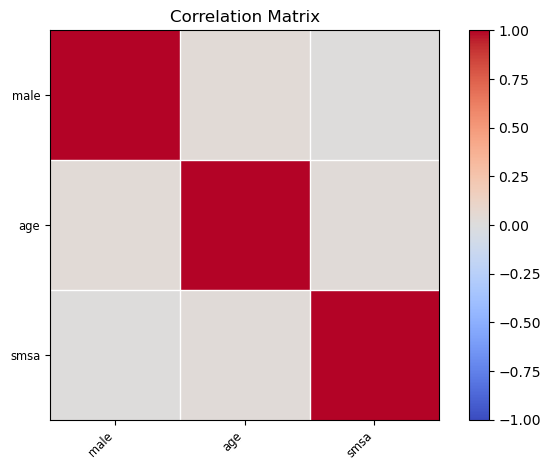

In [91]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()

## Задача 2.1

In [218]:
df  =  pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv') 
mod = smf.ols( formula = 'sleep~totwrk+age+I(age**2)+smsa+south+male',  data = df).fit() 
mod1 = smf.ols( formula = 'age~totwrk+I(age**2)+smsa+south+male',  data = df).fit() 
mod2 = smf.ols( formula = 'I(age**2)~totwrk+age++smsa+south+male',  data = df).fit() 
mod3 = smf.ols( formula = 'male~totwrk+age+I(age**2)+smsa+south',  data = df).fit() 

In [220]:
VIF1 = 1/(1-mod1.rsquared)
VIF2 = 1/(1-mod2.rsquared)
VIF3 = 1/(1-mod3.rsquared)

VIF1, VIF2, VIF3

(65.467619401788, 65.59649023827082, 1.1726285418999687)

## Задача 2.2

In [245]:
df  =  pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv') 
df['age2'] = df['age']**2
mod = smf.ols( formula = 'sleep~totwrk+age+age2+smsa+male+union',  data = df).fit() 
mod1 = smf.ols( formula = 'age~totwrk+age2+smsa+union+male',  data = df).fit() 
mod2 = smf.ols( formula = 'age2~totwrk+age+smsa+union+male',  data = df).fit() 
mod3 = smf.ols( formula = 'male~totwrk+age+age2+smsa+union',  data = df).fit() 
mod4 = smf.ols( formula = 'smsa~totwrk+age+age2+union+male',  data = df).fit() 
mod5 = smf.ols( formula = 'union~totwrk+age+age2+smsa+male',  data = df).fit() 
mod6 = smf.ols( formula = 'totwrk~age+age2+smsa+union+male',  data = df).fit() 
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,age2
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,2916


In [246]:
mod.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3688.5513,218.389,16.890,0.000,3259.774,4117.329
totwrk,-0.1653,0.018,-9.105,0.000,-0.201,-0.130
age,-7.7337,11.213,-0.690,0.491,-29.749,14.281
age2,0.1271,0.134,0.948,0.343,-0.136,0.390
smsa,-74.5269,32.156,-2.318,0.021,-137.661,-11.392
male,86.3215,34.329,2.515,0.012,18.922,153.721
union,8.5744,38.195,0.224,0.822,-66.416,83.564


In [239]:
t_cr=stats.t.ppf(1-0.1/2,706-7)
t_cr

1.6470364637535286

## Значимы totwrk, smsa и male

In [247]:
f_test = mod.f_test('age = age2 = 0') 
f_test.fvalue 

array([[2.49652954]])

In [225]:
#явно специфицируем тестируемую гипотезу
mod_ur = smf.ols( formula = 'sleep~totwrk+age+I(age**2)+smsa+union+male',  data = df).fit()
mod_rest = smf.ols( formula = 'sleep~totwrk+smsa+union+male',  data = df).fit()

In [226]:
#R2 observated для гипотезе о регресорах
F_obs = (mod_ur.rsquared - mod_rest.rsquared)/(1-mod_ur.rsquared)*(706-7)/2
F_obs

2.496529538580369

In [213]:
#F критическое: 
F_cr = stats.f.ppf(1-0.1, 2, 706-5)
F_cr

2.3101650178908515

## Гипотеза H0 отвергается

In [227]:
VIF1 = 1/(1-mod1.rsquared)
VIF2 = 1/(1-mod2.rsquared)
VIF3 = 1/(1-mod3.rsquared)
VIF4 = 1/(1-mod4.rsquared)
VIF5 = 1/(1-mod5.rsquared)
VIF6 = 1/(1-mod6.rsquared)
VIF1, VIF2, VIF3, VIF4, VIF5, VIF6

(65.39708205019622,
 65.56137274707447,
 1.171665566759322,
 1.0042782866790916,
 1.007332274406988,
 1.1954688382504761)

In [248]:
# Матрица корреляций
df = df[['totwrk', 'age', 'age2', 'smsa', 'male', 'union']].copy()
corr_matrix = df.corr().round(3)
corr_matrix
# на пересечении находятся коэффициенты корреляции. В регрессии коэффициенты корреляции должны стремиться к 0

,totwrk,age,age2,smsa,male,union
totwrk,1.000,-0.050,-0.067,-0.038,0.376,0.002
age,-0.050,1.000,0.992,0.025,0.032,-0.037
age2,-0.067,0.992,1.000,0.024,0.026,-0.042
smsa,-0.038,0.025,0.024,1.000,0.007,-0.039
male,0.376,0.032,0.026,0.007,1.000,0.040
union,0.002,-0.037,-0.042,-0.039,0.040,1.000


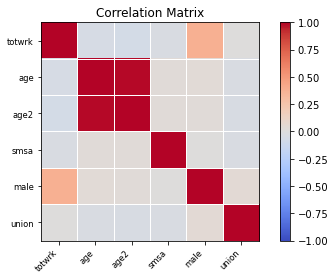

In [256]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()